In [19]:
# Instalação das bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Criação do DF
covid_complete = pd.read_csv(r"C:\Users\Marcelo Cabral\OneDrive\Documentos\Estudos\Data_Engineering\covid19-pipeline\data\raw\covid_19_clean_complete.csv")
covid_complete.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [21]:
covid_complete

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [22]:
covid_complete['Date_format'] = pd.to_datetime(covid_complete['Date']).dt.strftime('%d/%m/%Y')

covid_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Date_format
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,22/01/2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,22/01/2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,22/01/2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,22/01/2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,22/01/2020


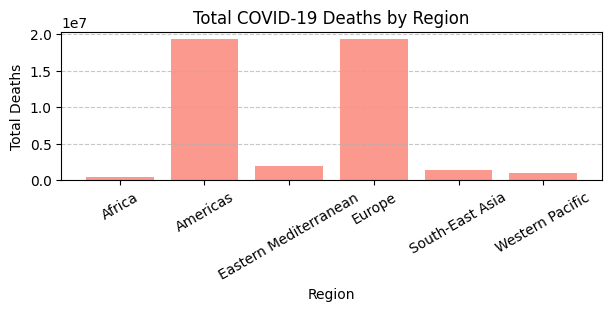

In [24]:
deaths_by_region = covid_complete.groupby("WHO Region")["Deaths"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(deaths_by_region.index, deaths_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Deaths')
ax.set_title('Total COVID-19 Deaths by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

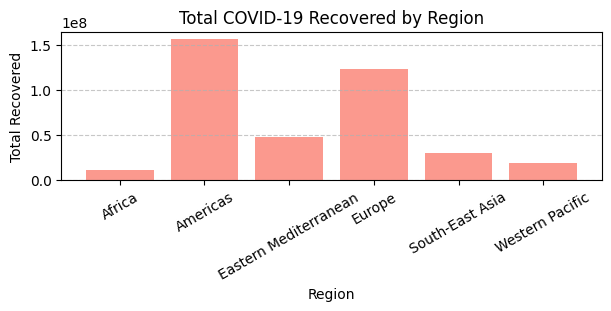

In [26]:
recover_by_region = covid_complete.groupby("WHO Region")["Recovered"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(recover_by_region.index, recover_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Recovered')
ax.set_title('Total COVID-19 Recovered by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

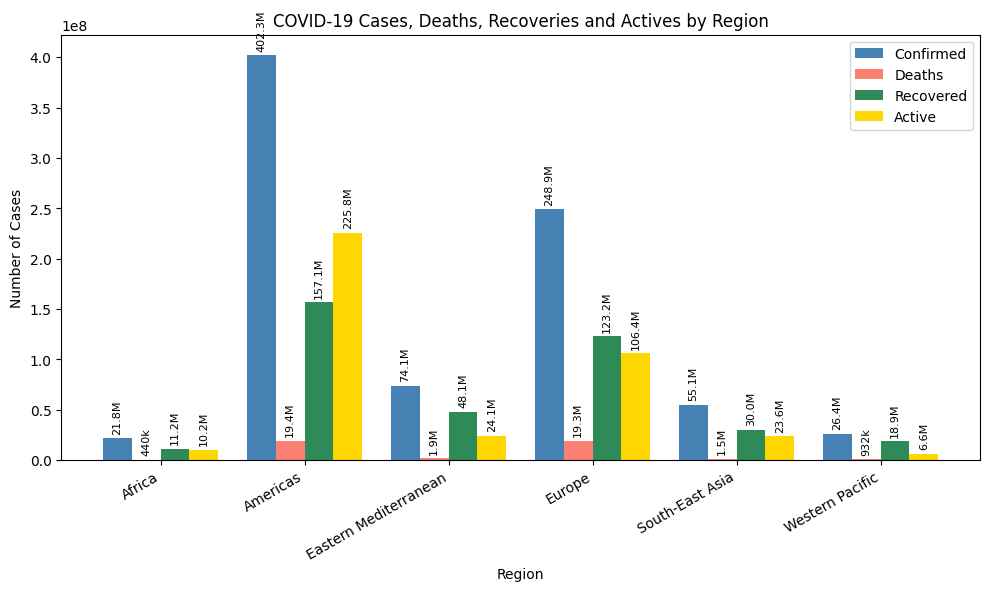

In [28]:
region_summary = covid_complete.groupby("WHO Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

regions = region_summary["WHO Region"]
confirmed = region_summary["Confirmed"]
deaths = region_summary["Deaths"]
recovered = region_summary["Recovered"]
actives = region_summary["Active"]

x = np.arange(len(regions))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - 1.5*width, confirmed, width, label="Confirmed", color='steelblue')
bars2 = ax.bar(x - 0.5*width, deaths, width, label="Deaths", color='salmon')
bars3 = ax.bar(x + 0.5*width, recovered, width, label="Recovered", color='seagreen')
bars4 = ax.bar(x + 1.5*width, actives, width, label="Active", color='gold')

ax.set_xlabel("Region")
ax.set_ylabel("Number of Cases")
ax.set_title("COVID-19 Cases, Deaths, Recoveries and Actives by Region")
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=30, ha='right')
ax.legend()

# Função para formatar números automaticamente
def format_number(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.0f}k"
    else:
        return str(int(value))

# Adiciona rótulos formatados acima das barras
ax.bar_label(bars1, labels=[format_number(v) for v in confirmed], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars2, labels=[format_number(v) for v in deaths], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars3, labels=[format_number(v) for v in recovered], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars4, labels=[format_number(v) for v in actives], padding=3, fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

In [30]:
covid_complete.columns = [ 
    "State",	
    "Country",	
    "Lat",	
    "Long",	
    "Date_ISO",	
    "Confirmed",	
    "Deaths",	
    "Recovered", 
    "Active", 
    "Region", 
    "Date_format"
]

covid_complete.head()

,State,Country,Lat,Long,Date_ISO,Confirmed,Deaths,Recovered,Active,Region,Date_format
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,22/01/2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,22/01/2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,22/01/2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,22/01/2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,22/01/2020


In [35]:
covid_confirmed = covid_complete.loc[covid_complete["Confirmed"] > 0]
covid_confirmed.head()

,State,Country,Lat,Long,Date_ISO,Confirmed,Deaths,Recovered,Active,Region,Date_format
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific,22/01/2020
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific,22/01/2020
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific,22/01/2020
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific,22/01/2020
53,Guangdong,China,23.3417,113.4244,2020-01-22,26,0,0,26,Western Pacific,22/01/2020


In [41]:
cases_country = covid_complete.groupby("Country")["Confirmed"].sum()
sorted_covid_confirmed = cases_country.sort_values(ascending=False) 
print(sorted_covid_confirmed)

Country
US                       224345948
Brazil                    89524967
Russia                    45408411
India                     40883464
Spain                     27404045
                           ...    
Saint Kitts and Nevis         1772
Greenland                     1507
Holy See                      1356
Papua New Guinea              1185
Western Sahara                 901
Name: Confirmed, Length: 187, dtype: int64


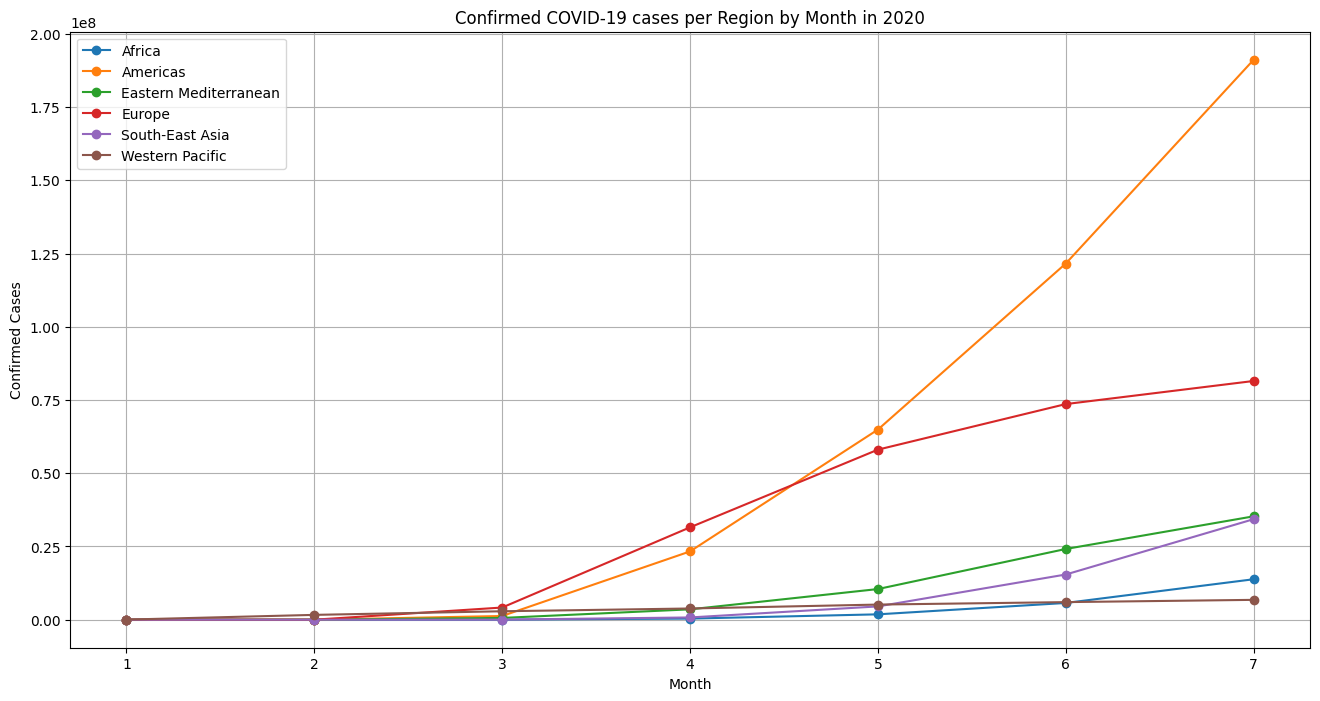

In [73]:
covid_complete["Month"] = pd.to_datetime(covid_complete["Date_ISO"], format="%Y-%m-%d", errors="coerce").dt.month

region_Month_summary = covid_complete.groupby(["Month", "Region"])[["Confirmed"]].sum().reset_index()

plt.figure(figsize=(16,8))
for region in region_Month_summary["Region"].unique():
    data_region = region_Month_summary[region_Month_summary["Region"] == region]
    plt.plot(data_region["Month"], data_region["Confirmed"], label=region, marker="o")

plt.title("Confirmed COVID-19 cases per Region by Month in 2020")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.show()